In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from settings import INPUTS_PATH, DATA_UTILS_PATH

plt.style.use("bmh")

In [9]:
df = pd.read_csv(os.path.join(INPUTS_PATH,  "fredmd_raw_df.csv"))
df.set_index("date", inplace=True)

des = pd.read_csv(os.path.join(DATA_UTILS_PATH,  "fredmd_description.csv"), sep=";")

## 1) Raw dataset

In [10]:
print(df.shape)
df.head()

(757, 123)


,BAA,CES3000000008,IPBUSEQ,T1YFFM,CP3Mx,ISRATIOx,IPFUELS,DDURRG3M086SBEA,BUSLOANS,PAYEMS,...,USCONS,ACOGNO,HOUSTMW,M2SL,CES0600000008,HWI,CPIULFSL,INDPRO,M1SL,USWTRADE
date,,,,,,,,,,,,,,,,,,,,,
1960-01-01,5.34,2.13,9.1692,1.04,4.91,1.549669,33.9618,57.056,39.6291,54274,...,3021,NaN,358,298.2,2.22,1971.0,29.6,24.2247,140.0,2657.9
1960-02-01,5.34,2.14,9.2286,0.69,4.66,1.570331,34.3160,57.149,39.7872,54513,...,3053,NaN,383,298.4,2.23,1971.0,29.6,24.0092,139.9,2662.6
1960-03-01,5.25,2.14,9.2485,0.18,4.49,1.601325,34.6702,56.982,40.0180,54454,...,2881,NaN,206,299.3,2.24,1885.0,29.6,23.7936,139.8,2666.8
1960-04-01,5.20,2.14,9.1493,0.12,4.16,1.590993,35.7327,57.050,40.5152,54813,...,3004,NaN,288,300.1,2.23,1845.0,29.6,23.6050,139.6,2677.3
1960-05-01,5.28,2.14,9.1791,0.36,4.25,1.621987,34.7489,57.044,40.8926,54475,...,3021,NaN,298,300.9,2.24,1822.0,29.6,23.5780,139.6,2671.7


## 2) FRED MD data description

In [11]:
des.head()

,id,tcode,ttype,fred,description,gsi,gsi:description,group,edited
0,1,5,First difference of natural log: ln(x)-ln(x-1),RPI,Real Personal Income,M_14386177,PI,Output and Income,False
1,2,5,First difference of natural log: ln(x)-ln(x-1),W875RX1,Real personal income ex transfer receipts,M_145256755,PI less transfers,Output and Income,False
2,3,5,First difference of natural log: ln(x)-ln(x-1),DPCERA3M086SBEA,Real personal consumption expenditures,M_123008274,Real Consumption,"Consumption, Orders, and Inventories",False
3,4,5,First difference of natural log: ln(x)-ln(x-1),CMRMTSPLx,Real Manu. and Trade Industries Sales,M_110156998,M&T sales,"Consumption, Orders, and Inventories",True
4,5,5,First difference of natural log: ln(x)-ln(x-1),RETAILx,Retail and Food Services Sales,M_130439509,Retail sales,"Consumption, Orders, and Inventories",True


### Groups

In [12]:
des["group"].unique()

array(['Output and Income', 'Consumption, Orders, and Inventories',
       'Labor Market', 'Housing', 'Money and Credit', 'Stock Market',
       'Interest and Exchange Rates', 'Prices'], dtype=object)

### Transformations

In [13]:
des["ttype"].unique()

array(['First difference of natural log: ln(x)-ln(x-1)',
       'Level (i.e. no transformation): x(t)',
       'First difference: x(t)-x(t-1)', 'Natural log: ln(x)',
       'Second difference of natural log: (ln(x)-ln(x-1))-(ln(x-1)-ln(x-2))',
       'First difference of percent change: (x(t)/x(t-1)-1)-(x(t-1)/x(t-2)-1)'],
      dtype=object)

## 3) Prices

In [14]:
des.loc[des["group"] == "Prices"]

,id,tcode,ttype,fred,description,gsi,gsi:description,group,edited
105,106,6,Second difference of natural log: (ln(x)-ln(x-...,WPSFD49207,PPI: Finished Goods,M110157517,PPI: n gds,Prices,False
106,107,6,Second difference of natural log: (ln(x)-ln(x-...,WPSFD49502,PPI: Finished Consumer Goods,M110157508,PPI: cons gds,Prices,False
107,108,6,Second difference of natural log: (ln(x)-ln(x-...,WPSID61,PPI: Intermediate Materials,M_110157527,PPI: int matls,Prices,False
108,109,6,Second difference of natural log: (ln(x)-ln(x-...,WPSID62,PPI: Crude Materials,M_110157500,PPI: crude matls,Prices,False
109,110,6,Second difference of natural log: (ln(x)-ln(x-...,OILPRICEx,"Crude Oil, spliced WTI and Cushing",M_110157273,Spot market price,Prices,True
110,111,6,Second difference of natural log: (ln(x)-ln(x-...,PPICMM,PPI: Metals and metal products:,M_110157335,PPI: nonferrous,Prices,False
111,112,1,Level (i.e. no transformation): x(t),NAPMPRI,ISM Manufacturing: Prices Index,M_110157204,NAPM com price,Prices,False
112,113,6,Second difference of natural log: (ln(x)-ln(x-...,CPIAUCSL,CPI : All Items,M_110157323,CPI-U: all,Prices,False
113,114,6,Second difference of natural log: (ln(x)-ln(x-...,CPIAPPSL,CPI : Apparel,M_110157299,CPI-U: apparel,Prices,False
114,115,6,Second difference of natural log: (ln(x)-ln(x-...,CPITRNSL,CPI : Transportation,M_110157302,CPI-U: transp,Prices,False


### CPI categories

<Axes: xlabel='date'>

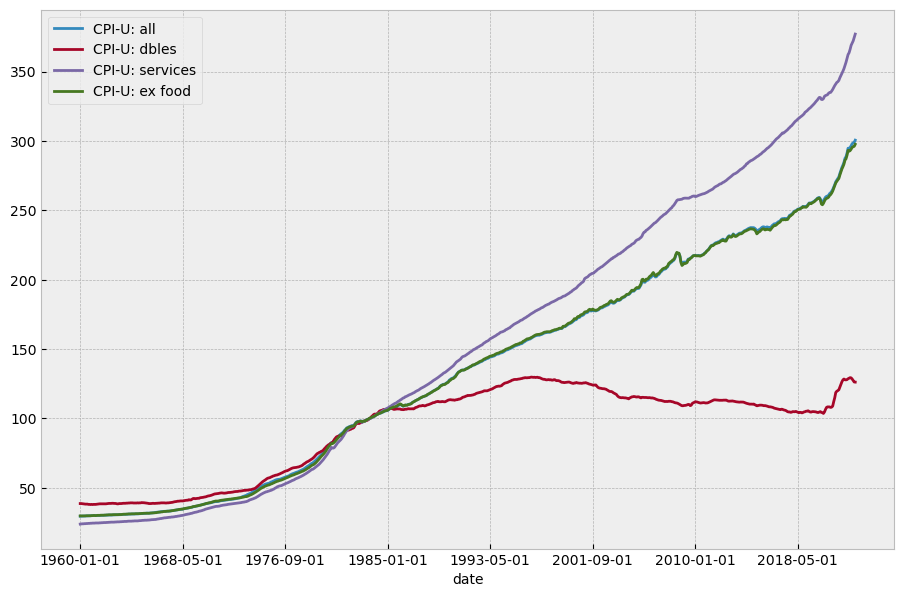

In [16]:
selected_vars = ["CPIAUCSL", "CUSR0000SAD", "CUSR0000SAS", "CPIULFSL"]

selected_df = df[selected_vars]
selected_df.columns = [des.loc[des["fred"] == var]["gsi:description"].iloc[0] for var in selected_vars]

(selected_df).plot(figsize=(11, 7))

<Axes: xlabel='date'>

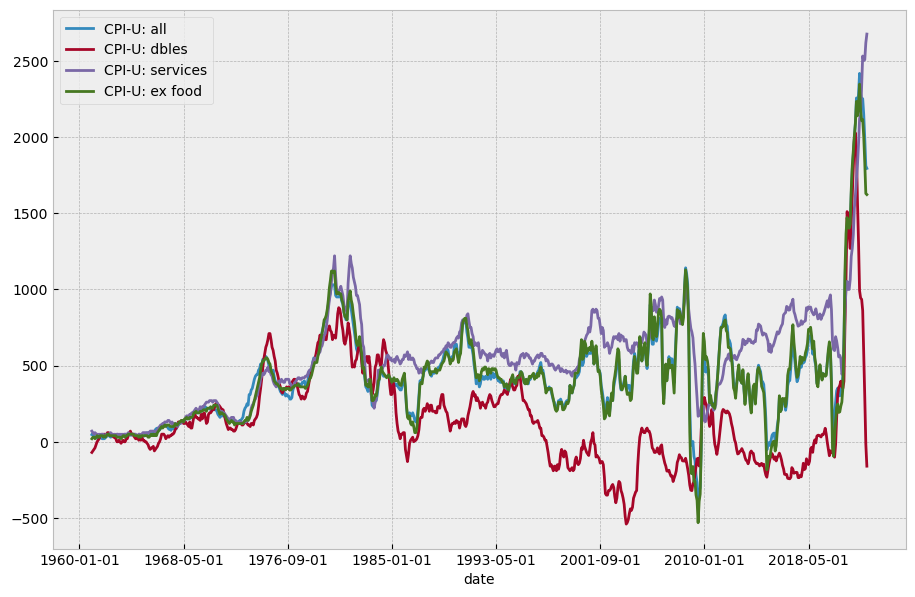

In [19]:
(selected_df.diff(12) * 100).plot(figsize=(11, 7))

<Axes: xlabel='date'>

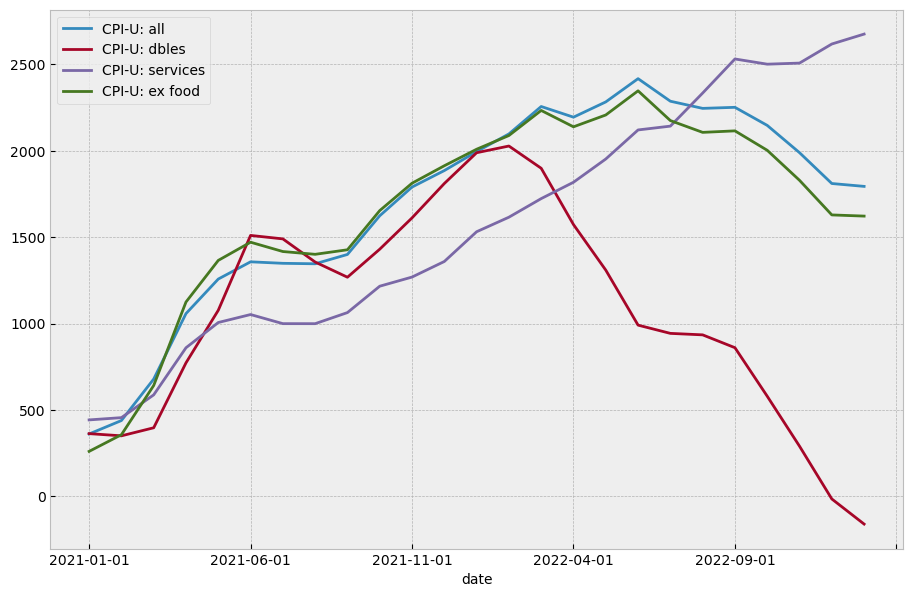

In [18]:
(selected_df.diff(12) * 100).loc["2021-01-01":].plot(figsize=(11, 7))

## 4) Interest and exchange rates

In [20]:
des.loc[des["group"] == "Interest and Exchange Rates"]

,id,tcode,ttype,fred,description,gsi,gsi:description,group,edited
83,84,2,First difference: x(t)-x(t-1),FEDFUNDS,E?ective Federal Funds Rate,M_110155157,Fed Funds,Interest and Exchange Rates,False
84,85,2,First difference: x(t)-x(t-1),CP3Mx,3-Month AA Financial Commercial Paper Rate,CPF3M,Comm paper,Interest and Exchange Rates,True
85,86,2,First difference: x(t)-x(t-1),TB3MS,3-Month Treasury Bill:,M_110155165,3 mo T-bill,Interest and Exchange Rates,False
86,87,2,First difference: x(t)-x(t-1),TB6MS,6-Month Treasury Bill:,M_110155166,6 mo T-bill,Interest and Exchange Rates,False
87,88,2,First difference: x(t)-x(t-1),GS1,1-Year Treasury Rate,M_110155168,1 yr T-bond,Interest and Exchange Rates,False
88,89,2,First difference: x(t)-x(t-1),GS5,5-Year Treasury Rate,M_110155174,5 yr T-bond,Interest and Exchange Rates,False
89,90,2,First difference: x(t)-x(t-1),GS10,10-Year Treasury Rate,M_110155169,10 yr T-bond,Interest and Exchange Rates,False
90,91,2,First difference: x(t)-x(t-1),AAA,Moody s Seasoned Aaa Corporate Bond Yield,NaN,Aaa bond,Interest and Exchange Rates,False
91,92,2,First difference: x(t)-x(t-1),BAA,Moody s Seasoned Baa Corporate Bond Yield,NaN,Baa bond,Interest and Exchange Rates,False
92,93,1,Level (i.e. no transformation): x(t),COMPAPFFx,3-Month Commercial Paper Minus FEDFUNDS,NaN,CP-FF spread,Interest and Exchange Rates,True


<Axes: xlabel='date'>

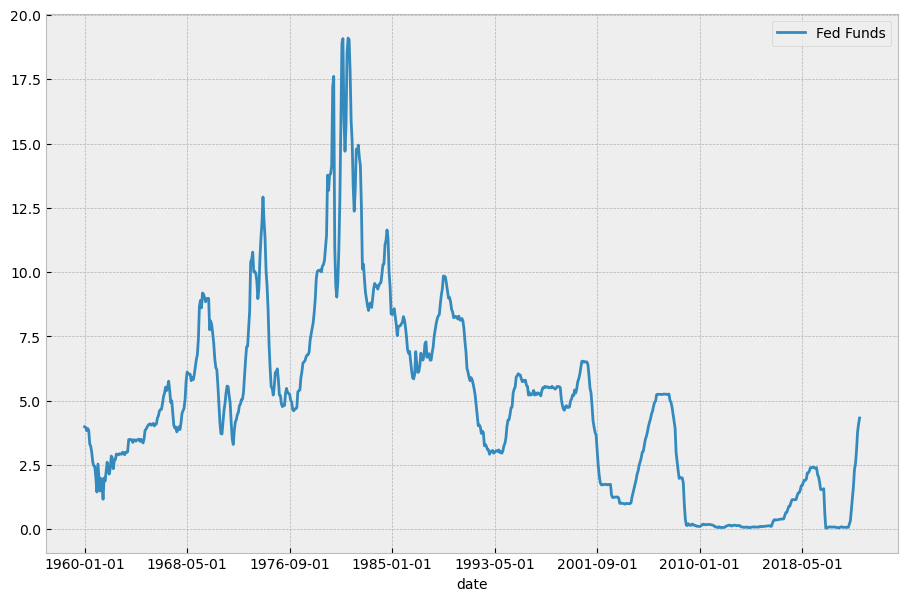

In [21]:
selected_vars = ["FEDFUNDS"]

selected_df = df[selected_vars]
selected_df.columns = [des.loc[des["fred"] == var]["gsi:description"].iloc[0] for var in selected_vars]

selected_df.plot(figsize=(11, 7))